In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv(r'D:\project\insurance_data_700.csv')
df

,age,bought_insurance
0,56,0
1,46,0
2,32,0
3,60,1
4,25,0
...,...,...
695,28,1
696,29,0
697,27,0
698,49,1


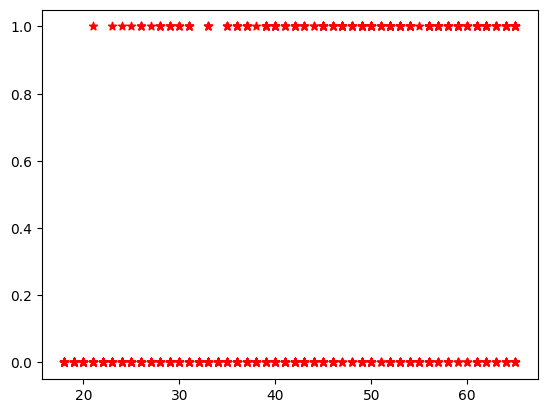

In [3]:
plt.scatter(df.age, df.bought_insurance, marker='*', color='red')

In [4]:
df.shape

(700, 2)

In [39]:
from sklearn.model_selection import train_test_split
X = df[['age']]
y = df.bought_insurance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [40]:
X_test

,age
693,33
557,53
65,21
471,45
545,46
...,...
10,28
519,50
241,53
517,20


In [41]:
X_train

,age
546,53
648,56
317,50
25,29
433,57
...,...
305,53
43,21
321,39
304,58


In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
#accuracy score on test data on how well the model performed using x_test 
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [45]:
#accuracy score on test data because the data size is small
model.score(X_test, y_test)

0.6547619047619048

In [46]:
#class1 & class2 probabilities
#not bought & bought insurance x_test
model.predict_proba(X_test)

array([[0.8093717 , 0.1906283 ],
       [0.52899565, 0.47100435],
       [0.90411654, 0.09588346],
       [0.65656884, 0.34343116],
       [0.64142395, 0.35857605],
       [0.87117296, 0.12882704],
       [0.90972779, 0.09027221],
       [0.8093717 , 0.1906283 ],
       [0.68590052, 0.31409948],
       [0.86352469, 0.13647531],
       [0.44612445, 0.55387555],
       [0.7649422 , 0.2350578 ],
       [0.36614354, 0.63385646],
       [0.68590052, 0.31409948],
       [0.89819553, 0.10180447],
       [0.92006995, 0.07993005],
       [0.54552454, 0.45447546],
       [0.82905077, 0.17094923],
       [0.75277692, 0.24722308],
       [0.77668644, 0.22331356],
       [0.72720659, 0.27279341],
       [0.3975186 , 0.6024814 ],
       [0.59437392, 0.40562608],
       [0.81942014, 0.18057986],
       [0.90972779, 0.09027221],
       [0.90972779, 0.09027221],
       [0.65656884, 0.34343116],
       [0.85549768, 0.14450232],
       [0.62599164, 0.37400836],
       [0.46260717, 0.53739283],
       [0.

In [47]:
# The ROC curve is based on the probabilities
y_pred_proba = model.predict_proba(X_test)[::,1]



In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


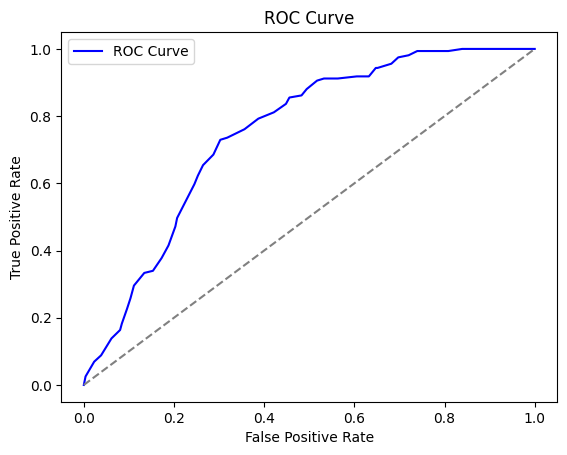

In [49]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [50]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)


AUC Score: 0.7508976119906504
